In [295]:
from zget_data import get_responses, get_qdetails, get_questions, get_design, page_map, quest_map, attention, did_map
import pandas as pd
import json
import seaborn as sns

In [296]:
password_response, time_response, survey_response = get_responses(1)

Total: 26


## Password Analysis

In [297]:
pd.DataFrame(password_response)
# password_response.head(5)

,password2,password2_recall1,password2_recall2,password2_recall3
0,6IctttoCM^,NaN,NaN,NaN
1,Aksh4aya%dm,NaN,NaN,NaN
2,Ih7nmi!tb,NaN,NaN,NaN
3,0mgH4x0r*,NaN,NaN,NaN
4,TTI7WKAH^FR!,NaN,NaN,NaN
5,Pass@123$word,NaN,NaN,NaN
6,Abin3esh&dm,NaN,NaN,NaN
7,53642894,NaN,NaN,NaN
8,Ihbt7c@tya,NaN,NaN,NaN
9,iw4dt%%,NaN,NaN,NaN


## Time Analysis

,startstudy,fpasssurvey,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,320.098,70.347,8.202,17.538,67.491,274.386,14.882,78.530,13.076,51.190,18.026,87.482,17.020800
1,11.610,111.018,6.067,8.859,57.643,156.844,7.002,85.860,107.917,50.812,12.061,63.077,11.312833
2,815.097,26.994,10.508,47.108,374.407,378.374,150.457,215.862,11.023,57.999,35.684,65.852,36.489417
3,1.374,12.144,2.570,4.465,21.145,69.909,3.354,60.452,10.703,20.888,2.649,23.224,3.881283
4,6.585,24.890,8.497,39.450,71.585,201.481,13.449,93.033,14.217,50.802,9.465,35.047,9.475017


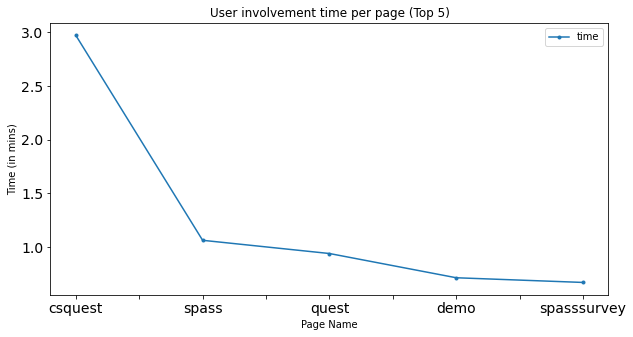

In [298]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
display(page_time_df.head())

# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.median().div(60).sort_values(ascending=False).head(5).items():
    top5 = pd.concat([top5, pd.DataFrame([[i, data]], columns=top5.columns)])

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in mins)", title="User involvement time per page (Top 5)", fontsize=14, style=".-")

## Survey Response Analysis

In [299]:
survey_response_df = pd.DataFrame(survey_response)

### Quest

In [300]:
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest.drop(attention.get('7'), inplace=True)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

# normalize scale 1 to 8 to scale -3 to 3
quest = quest - 4
quest.update(quest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest['median'] = quest.median(axis=1)
quest['STD'] = quest.std(axis=1)

quest

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,mean,median,STD
rewarding,2.0,1.0,2.0,3.0,2.0,3.0,1.0,1.0,1.0,1.0,...,-1.0,0.0,1.0,-1.0,0.0,2.0,-1.0,1.076923,1.0,1.463783
organized,3.0,1.0,3.0,3.0,1.0,3.0,1.0,-1.0,1.0,2.0,...,1.0,-1.0,3.0,1.0,0.0,-1.0,0.0,1.730769,2.0,1.376863
structured,3.0,1.0,3.0,3.0,0.0,3.0,2.0,-2.0,1.0,2.0,...,1.0,1.0,3.0,2.0,3.0,3.0,0.0,1.961538,2.0,1.290463
well grouped,3.0,2.0,3.0,3.0,0.0,3.0,2.0,0.0,1.0,0.0,...,2.0,2.0,2.0,1.0,2.0,0.0,0.0,1.884615,2.0,1.065741
ordered,3.0,1.0,3.0,3.0,0.0,3.0,2.0,0.0,1.0,2.0,...,2.0,-3.0,3.0,1.0,1.0,-2.0,-1.0,1.500000,2.0,1.663787
beneficial,3.0,1.0,3.0,3.0,2.0,3.0,1.0,1.0,2.0,2.0,...,1.0,1.0,3.0,2.0,-2.0,3.0,0.0,1.461538,2.0,1.873214
helpful,3.0,2.0,3.0,3.0,2.0,3.0,1.0,2.0,2.0,1.0,...,2.0,0.0,3.0,1.0,3.0,2.0,-1.0,1.884615,2.0,1.523479
easy,1.0,1.0,2.0,3.0,0.0,3.0,2.0,1.0,-3.0,-1.0,...,2.0,0.0,3.0,0.0,3.0,-2.0,-2.0,1.153846,1.0,1.693205
appealing,2.0,2.0,3.0,3.0,-3.0,3.0,1.0,1.0,0.0,2.0,...,-1.0,1.0,2.0,-1.0,1.0,-3.0,-2.0,0.653846,1.0,1.655520
pleasant,0.0,1.0,3.0,3.0,-3.0,3.0,2.0,1.0,0.0,2.0,...,2.0,2.0,1.0,-1.0,2.0,-3.0,-2.0,0.769231,1.0,1.662960


In [301]:
cats = {}
for k, v in quest_map.items():
    temp = quest.loc[v]
    cats[k] = temp

for k, v in cats.items():
    print(f'{k}: {v["mean"].mean()}')
    print(f'{k}: {v["STD"].std()}')
    print(10*'*')


Perspicuity: 1.3365384615384615
Perspicuity: 0.14380403403611267
**********
Aesthetics: 0.4807692307692307
Aesthetics: 0.062400639873083655
**********
Usefulness: 1.5288461538461537
Usefulness: 0.1807299237444021
**********
Clarity: 1.7692307692307692
Clarity: 0.24733887891343548
**********


### CSQuest

In [302]:
csquest = pd.DataFrame(survey_response_df['8'].to_dict())
qualindex = ['9-1', '11-1']
csquestqual = csquest.loc[qualindex]
# csquestqual.to_csv('qualitative/csquest_info.csv')
csquestqual

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
9-1,"[Social Media, Email, Financial Websites]","[Social Media, Email, Financial Websites, Gami...","[Social Media, Email, Financial Websites, Gami...","[Social Media, Email, Financial Websites, Gami...","[Social Media, Email, Gaming Websites, Content...","[Social Media, Email, Financial Websites, E-co...","[Social Media, Email, Financial Websites, Gami...","[Social Media, Email, Course Management Websit...","[Email, Financial Websites, E-commerce Websites]","[Course Management Websites, e.g. Canvas, Blac...",...,[None of the above],[Financial Websites],"[Social Media, Email, Financial Websites, Gami...","[Social Media, Email]","[Financial Websites, Government Websites, Cour...","[Social Media, Email, E-commerce Websites, Cou...","[E-commerce Websites, Course Management Websit...","[Gaming Websites, Course Management Websites, ...","[Social Media, Email, Financial Websites, E-co...",[Social Media]
11-1,"I like the idea. I like the example phrase ""I ...",with the help of the expert i gather raw detai...,"I like it because really clear, easy to unders...",I think it looks great,"I think it is a great presentation, and easy t...",The presentation was very useful for a perfect...,By accurate and relevant technique which is re...,the presentation design will be very nice,it is structured and clear.,I like the design. I don't think it makes reme...,...,It requires one to memorize a complex password...,It makes me think about coming up with a passw...,I think the design is unique and extremely hel...,With the help of cyber security expert by the ...,It is easy to evaluate and create ideas for st...,I think it is straight forward and presents a ...,The presentation is clear and easily understan...,It is easy to evaluate and create some strong ...,"The presentation is clear and clean, it's nice...",Seems simple and affective. I wish the numbers...


In [303]:
csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)

normqsid = []
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

# normalize scale 1 to 8 to scale -3 to 3
csquestquant = csquestquant - 4
csquestquant.update(csquestquant)

# new_columns = {}
# for qsid in csquestquant.columns:
#     new_columns[qsid] = json.loads(get_qdetails(page_id, qsid).split('\n')[1].replace("'", '"')).get('keyword')
# csquestquant.rename(columns=new_columns, inplace=True)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('keyword')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)
csquestquant['STD'] = csquestquant.std(axis=1)

csquestquant

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,mean,median,STD
Stimulation,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,-1.0,...,1.0,2.0,2.0,1.0,1.0,3.0,1.0,1.230769,2.0,1.623736
Trust,1.0,2.0,2.0,3.0,2.0,3.0,1.0,1.0,2.0,-1.0,...,2.0,0.0,2.0,2.0,0.0,-1.0,1.0,1.038462,2.0,1.585269
Real life encouragement,2.0,2.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0,-1.0,...,1.0,3.0,2.0,2.0,2.0,-3.0,1.0,1.500000,2.0,1.833243
Example helped,3.0,1.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0,...,0.0,1.0,2.0,1.0,-1.0,3.0,2.0,1.884615,2.0,1.448712
Encouragement,3.0,1.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,-2.0,...,1.0,-1.0,2.0,1.0,0.0,3.0,2.0,1.538462,2.0,1.617805
Capable,2.0,2.0,3.0,3.0,3.0,3.0,2.0,1.0,2.0,-1.0,...,0.0,1.0,2.0,1.0,2.0,3.0,1.0,1.692308,2.0,1.409357
Confident,2.0,2.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,-1.0,...,1.0,-2.0,3.0,0.0,2.0,3.0,1.0,1.461538,2.0,1.707729
Personal Connection,2.0,1.0,3.0,3.0,2.0,3.0,1.0,2.0,2.0,-1.0,...,0.0,2.0,2.0,1.0,-1.0,-2.0,1.0,1.076923,2.0,1.749791
Ease to follow message,3.0,2.0,3.0,3.0,2.0,3.0,2.0,1.0,1.0,2.0,...,2.0,0.0,3.0,1.0,1.0,-3.0,1.0,1.884615,2.0,1.342561
Novel,3.0,-1.0,1.0,3.0,3.0,3.0,-1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,-1.0,0.0,0.961538,1.0,1.231725


### First Password Survey

In [304]:
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['mean'] = fpass.mean(axis=1)
fpass['median'] = fpass.median(axis=1)
fpass['std'] = fpass.std(axis=1)

fpass

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,mean,median,std
"I do not change my passwords, unless I have to.",6,5,3,1,6,2,3,6,5,7,...,1,4,3,6,5,7,5,4.576923,5.0,1.683457
I use different passwords for different online accounts that I have.,5,6,7,7,7,7,4,6,4,7,...,5,6,7,3,6,4,5,5.423077,6.0,1.498976
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",4,6,4,7,7,2,5,5,6,7,...,6,5,6,2,3,4,4,4.346154,5.0,1.766948
I do not include special characters in my password if it’s not required.,3,4,3,1,1,2,4,4,5,4,...,1,7,1,5,7,1,3,3.500000,3.0,2.097097


### Second Password Survey

In [305]:
spass = pd.DataFrame(survey_response_df['12'].to_dict())
qualindex = ['8-1']
spassqual = spass.loc[qualindex]
# csquestqual.to_csv('data/qualitative/csquest_consequences.csv')
spassqual

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
8-1,I used a variation of the strategy presented i...,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,...,I used a variation of the strategy presented i...,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used a totally different strategy.,I used the same strategy presented in the design.,I used a variation of the strategy presented i...,I used a totally different strategy.,I used the same strategy presented in the design.,I used the same strategy presented in the design.


<AxesSubplot:xlabel='8-1'>

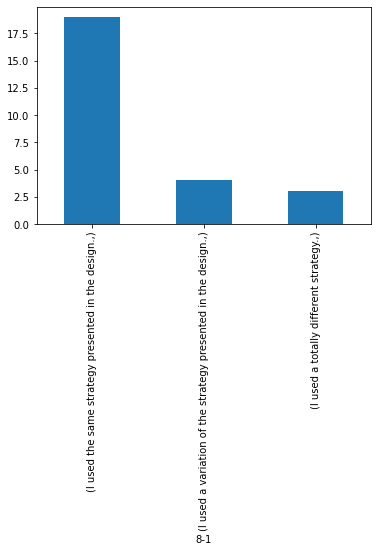

In [306]:
spassqual.T.value_counts().plot.bar()

In [307]:
spass = spass.drop(qualindex).fillna(0).astype(int)
spass.drop(attention.get('12'), inplace=True)

normqsid = ['3-1', '3-2', '3-3', '7-1']
normspass = 8 - spass.loc[normqsid]
spass.update(normspass)


# normalize scale 1 to 8 to scale -3 to 3
spass = spass - 4
spass.update(spass)

new_index = {}
for qsid in spass.index:
    # likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('keyword')
new_index
spass = spass.rename(new_index)
spass['mean'] = spass.mean(axis=1)
spass['median'] = spass.median(axis=1)
spass['STD'] = spass.std(axis=1)

spass

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,mean,median,STD
Password Strength,2.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,1.0,...,2.0,1.0,2.0,1.0,1.0,-2.0,0.0,1.538462,2.000000,1.474059
Motivation After Design,2.0,2.0,3.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,...,2.0,3.0,2.0,2.0,3.0,-1.0,1.0,1.807692,2.000000,1.361836
Hard to Remember,2.0,-2.0,2.0,-3.0,0.0,3.0,-2.0,-2.0,-3.0,-3.0,...,0.0,-1.0,1.0,1.0,-2.0,-3.0,0.0,-0.230769,0.000000,2.006164
Guessed by Hacker,2.0,1.0,3.0,3.0,2.0,3.0,-1.0,-1.0,3.0,2.0,...,-1.0,1.0,1.0,2.0,0.0,1.0,2.0,1.461538,2.000000,1.548489
Guessed by FnF,2.0,1.0,3.0,3.0,3.0,3.0,1.0,-2.0,3.0,2.0,...,-2.0,-2.0,3.0,1.0,-1.0,2.0,3.0,1.730769,2.000000,1.646380
Stronger than Usual,2.0,0.0,2.0,3.0,-3.0,3.0,0.0,2.0,2.0,3.0,...,1.0,-1.0,0.0,2.0,2.0,-3.0,0.0,1.230769,2.000000,1.734038
Helpful,2.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,...,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.923077,2.000000,1.184027
Easy to think memory,0.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,1.0,-1.0,...,2.0,0.0,3.0,1.0,3.0,2.0,1.0,1.423077,1.423077,1.725046
Difficult for num&char,2.0,-2.0,3.0,3.0,0.0,-3.0,-1.0,-2.0,-3.0,-3.0,...,0.0,-2.0,1.0,2.0,0.0,-3.0,1.0,0.384615,0.384615,2.178632


### Demographics

In [308]:
# demo = pd.DataFrame(survey_response_df['14'].to_dict())

# new_index = {}
# for qsid in demo.index:
#     new_index[qsid] = get_qdetails('14', qsid).split('\n')[0]

# demo = demo.rename(new_index).transpose()
# demo.head(5)


demo = pd.DataFrame(survey_response_df['14'].to_dict())

new_index = {}
for qsid in demo.index:
    new_index[qsid] = get_qdetails('14', qsid, 'keyword').split('\n')[0]

demo = demo.rename(new_index).transpose()
demo['race'] = demo['race'].str[0]


<AxesSubplot:xlabel='gender', ylabel='count'>

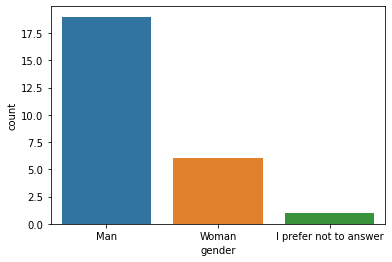

In [309]:
demo['gender'].value_counts()
sns.countplot(data=demo, x='gender', order=demo.gender.value_counts().index)

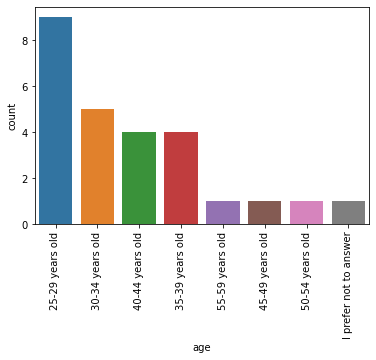

In [310]:
demo['age'].value_counts()
ax = sns.countplot(data=demo, x='age', order=demo.age.value_counts().index)
ax.tick_params(axis='x', rotation=90)


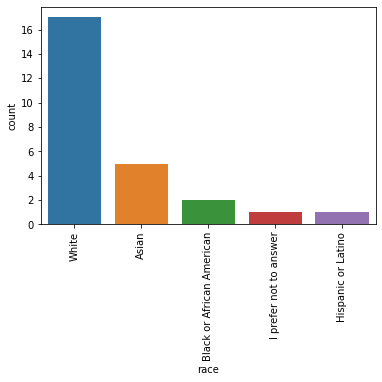

In [311]:
demo['race'].value_counts()
ax = sns.countplot(data=demo, x='race', order=demo.race.value_counts().index)
ax.tick_params(axis='x', rotation=90)
